# `Ex5 - RL`

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
from tqdm import tqdm


# Q1

### Part a

$$
g(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y-\mu)^2}
$$



### Part b

$$
\Delta \mu = \eta \cdot r \cdot e = \eta \cdot r \cdot \frac{\partial}{\partial \mu} ln(g(y|\mu, \sigma)) = 
\\
\eta \cdot r \cdot \frac{\partial}{\partial \mu} ln(\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y-\mu)^2}) = \eta \cdot r \cdot \frac{y-\mu}{\sigma^2}
$$

### Part  c

We'll compute $E[\Delta \mu|\mu]$

$$
E[\Delta \mu|\mu] = E[\eta \cdot r \cdot \frac{y-\mu}{\sigma^2}|\mu] = \frac{\eta}{\sigma^2} E[r\cdot (y- \mu)|\mu]  = \frac{\eta}{\sigma^2} E[-(m-y)^2\cdot (y- \mu)|\mu] = -\frac{\eta}{\sigma^2} E[(m^2 -2my + y^2)\cdot (y- \mu)|\mu]=
\\
-\frac{\eta}{\sigma^2} E[m^2\cdot y -2my^2 + y^3 - m^2\mu + 2my \mu - y^2 \mu|\mu]= 
\\
-\frac{\eta}{\sigma^2} E[y^2 \cdot (-2m -\mu) + y \cdot (2m \mu + m^2) + y^3 - m^2\mu |\mu]= 
\\
-\frac{\eta}{\sigma^2} \left( (-2m -\mu) E[y^2|\mu] + (2m \mu + m^2) E[y|\mu] +  E[y^3 |\mu] - m^2\mu \right) =
\\
\text{ We'll use the know properties of the normal distribution to compute the expectations}:
\\
E[y|\mu] = \mu, E[y^3|mu] = \mu^3 + 3\mu\sigma^2, E[y^2] = E[y]^2 + Var[y] = \mu^2 + \sigma^2
\\
\text{Plugging in the values}:
\\
-\frac{\eta}{\sigma^2} \left( (-2m -\mu) (E[y]^2 + Var[y])  + (2m \mu + m^2) \mu +  \mu^3 + 3\mu\sigma^2 - m^2\mu \right) =
\\
-\frac{\eta}{\sigma^2} \left( (-2m -\mu) (\mu^2 + \sigma^2)  + (2m \mu + m^2) \mu +  \mu^3 + 3\mu\sigma^2 - m^2\mu \right) =
\\
-\frac{\eta}{\sigma^2} \left( -2m \mu^2 - 2m \sigma^2 - \mu^3 - \mu\sigma^2 + 2m \mu^2 + m^2 \mu + \mu^3 + 3\mu\sigma^2- m^2\mu \right) =
\\
-\frac{\eta}{\sigma^2} \left( -2m \sigma^2 + 2 \mu\sigma^2 \right) = \frac{2 \eta}{\sigma^2} (m \sigma^2 - \mu\sigma^2) = 2 \eta (m - \mu)
$$

### Part d

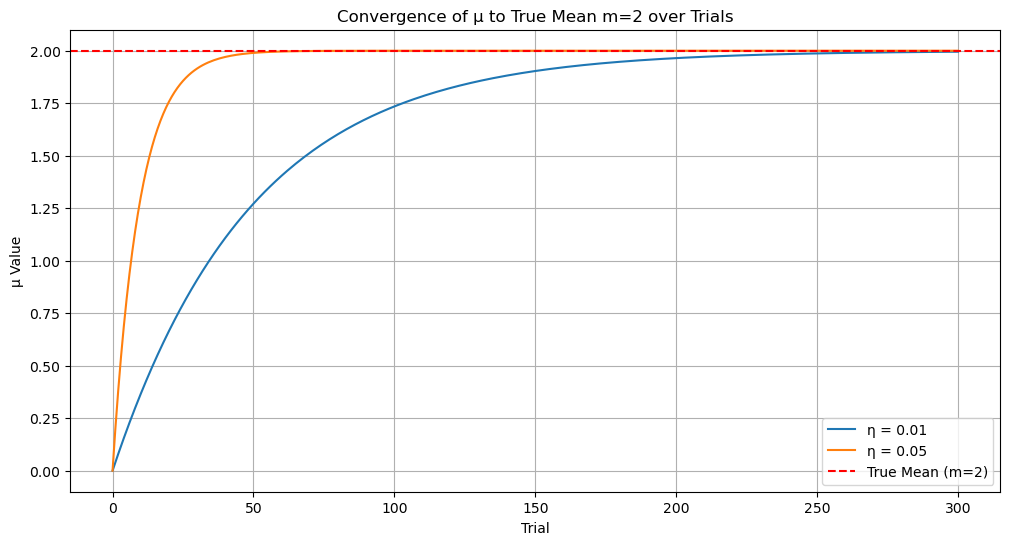

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mu(mu0, m, eta, trials):
    """
    Simulates the update of mu over a number of trials.

    Parameters:
    - mu0 (float): Initial value of mu.
    - m (float): True mean to converge to.
    - eta (float): Learning rate.
    - trials (int): Number of trials.

    Returns:
    - mu_history (list): History of mu values over trials.
    """
    mu = mu0
    mu_history = [mu]
    
    for t in range(1, trials + 1):
        delta_mu = 2 * eta * (m - mu)
        mu += delta_mu
        mu_history.append(mu)
        
    return mu_history

# Simulation parameters
mu0 = 0          # Initial value of mu
m = 2            # True mean
etas = [0.01, 0.05]  # Learning rates
trials = 300     # Number of trials

# Dictionary to store mu histories for different learning rates
mu_histories = {}

for eta in etas:
    mu_histories[eta] = simulate_mu(mu0, m, eta, trials)

# Plotting
plt.figure(figsize=(12, 6))
for eta in etas:
    plt.plot(mu_histories[eta], label=f'η = {eta}')

plt.axhline(y=m, color='r', linestyle='--', label='True Mean (m=2)')
plt.title('Convergence of μ to True Mean m=2 over Trials')
plt.xlabel('Trial')
plt.ylabel('μ Value')
plt.legend()
plt.grid(True)
plt.show()


### Part e

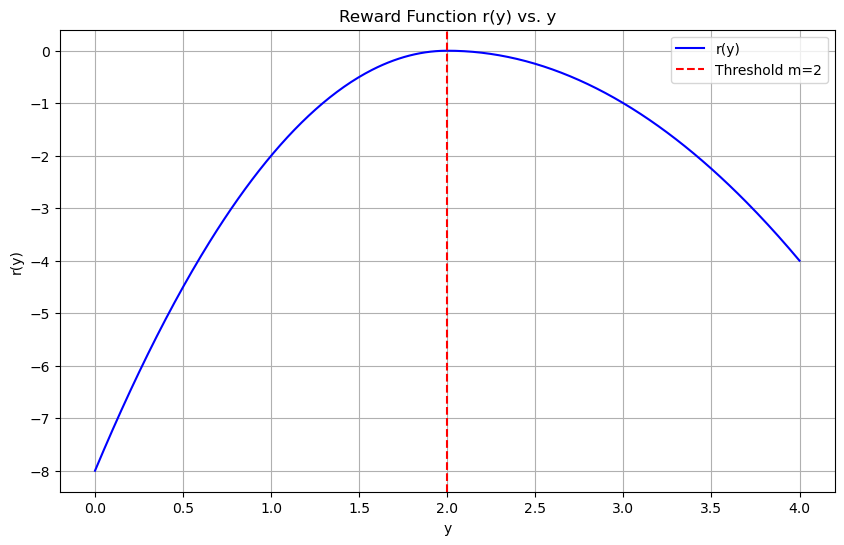

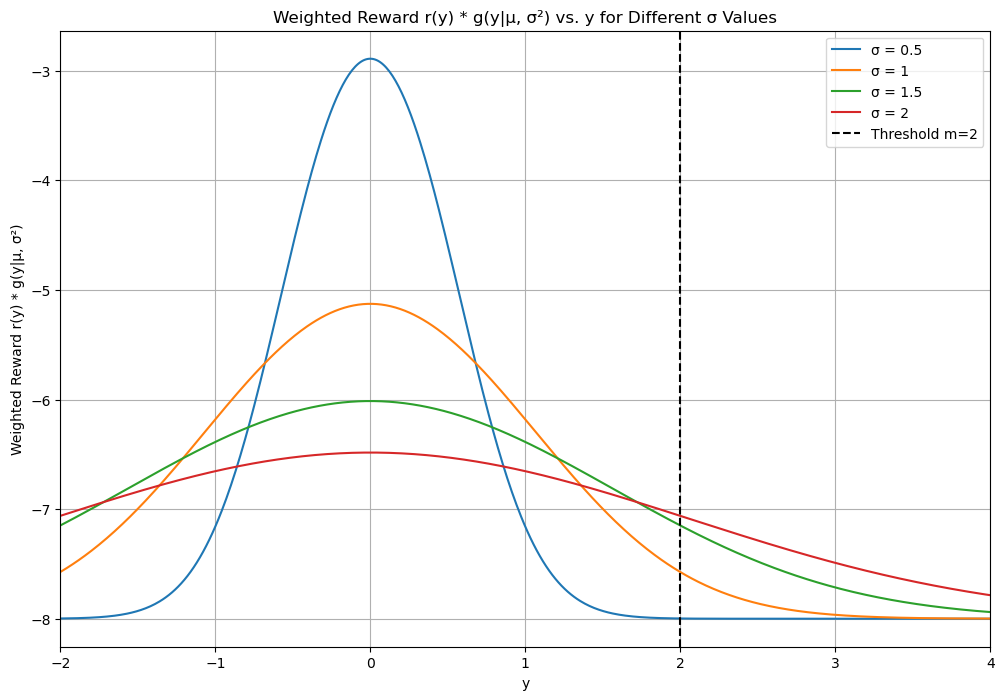

In [9]:
from scipy.integrate import simps


def reward_function(y, m):

    r = np.where(y <= m, -2 * (m - y)**2, -(m - y)**2)
    return r

def gaussian_pdf(y, mu, sigma):
 
    coef = 1 / np.sqrt(2 * np.pi * sigma**2)
    exponent = - ((y - mu)**2) / (2 * sigma**2)
    g = coef * np.exp(exponent)
    return g

def expected_reward(mu, m, sigma, y_values, r_values, g_values):
  
    weighted_r = r_values * g_values
    E_r = simps(weighted_r, y_values)  # Using Simpson's rule for integration
    return E_r

def update_mu(mu_current, y, r, eta, sigma):
   
    delta_mu = eta * r * (y - mu_current) / sigma**2
    mu_new = mu_current + delta_mu
    return mu_new


# Parameters
m = 2  # Given m = 2

# Define y range
y_values = np.linspace(0, 4, 400)  # y from 0 to 4

# Compute rewards
r_values = reward_function(y_values, m)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_values, r_values, label='r(y)', color='blue')
plt.axvline(x=m, color='red', linestyle='--', label='Threshold m=2')
plt.title('Reward Function r(y) vs. y')
plt.xlabel('y')
plt.ylabel('r(y)')
plt.legend()
plt.grid(True)
plt.show()

# Parameters
mu = 0          # Initial mu0 = 0
sigma_values = [0.5, 1, 1.5, 2]  # Different sigma values
y_values_extended = np.linspace(-2, 6, 800)  # Extended y range to capture tails

# Compute rewards for the extended y range
r_values_extended = reward_function(y_values_extended, m)

# Plotting
plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    g_values = gaussian_pdf(y_values_extended, mu, sigma)
    weighted_r = reward_function(g_values, m) 
    plt.plot(y_values_extended, weighted_r, label=f'σ = {sigma}')
plt.xlim(-2,4)  
plt.axvline(x=m, color='black', linestyle='--', label='Threshold m=2')
plt.title('Weighted Reward r(y) * g(y|μ, σ²) vs. y for Different σ Values')
plt.xlabel('y')
plt.ylabel('Weighted Reward r(y) * g(y|μ, σ²)')
plt.legend()
plt.grid(True)
plt.show()


Higher standard deviation will lead to larger divergence from the target area

# Q2

### Part a

In [4]:
def reward_function1(y, m):

    r = -(m - y)**2
    return r

def gaussian_pdf(y, mu, sigma):
 
    coef = 1 / np.sqrt(2 * np.pi * sigma**2)
    exponent = - ((y - mu)**2) / (2 * sigma**2)
    g = coef * np.exp(exponent)
    return g

def expected_reward(mu, m, sigma, y_values, r_values, g_values):
  
    weighted_r = r_values * g_values
    E_r = simps(weighted_r, y_values)  # Using Simpson's rule for integration
    return E_r

def update_mu(mu_current, y, r, eta, sigma):
   
    delta_mu = eta * r * (y - mu_current) / sigma**2
    mu_new = mu_current + delta_mu
    return mu_new

def simulate_mu(mu0, m, sigma, eta, trials):
  
    mu = mu0
    mu_history = np.zeros(trials + 1)
    mu_history[0] = mu0
    
    for t in range(1, trials + 1):
        # Sample y from N(mu, sigma^2)
        y = np.random.normal(mu, sigma)
        
        # Compute reward r(y)
        r = reward_function1(y, m)
        
        # Update mu
        mu = update_mu(mu, y, r, eta, sigma)
        
        # Store mu
        mu_history[t] = mu
        
    return mu_history

In [5]:
eta_values = np.logspace(-5, -2, 6)  # Learning rates from 0.001 to 1


Learning Rates: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]


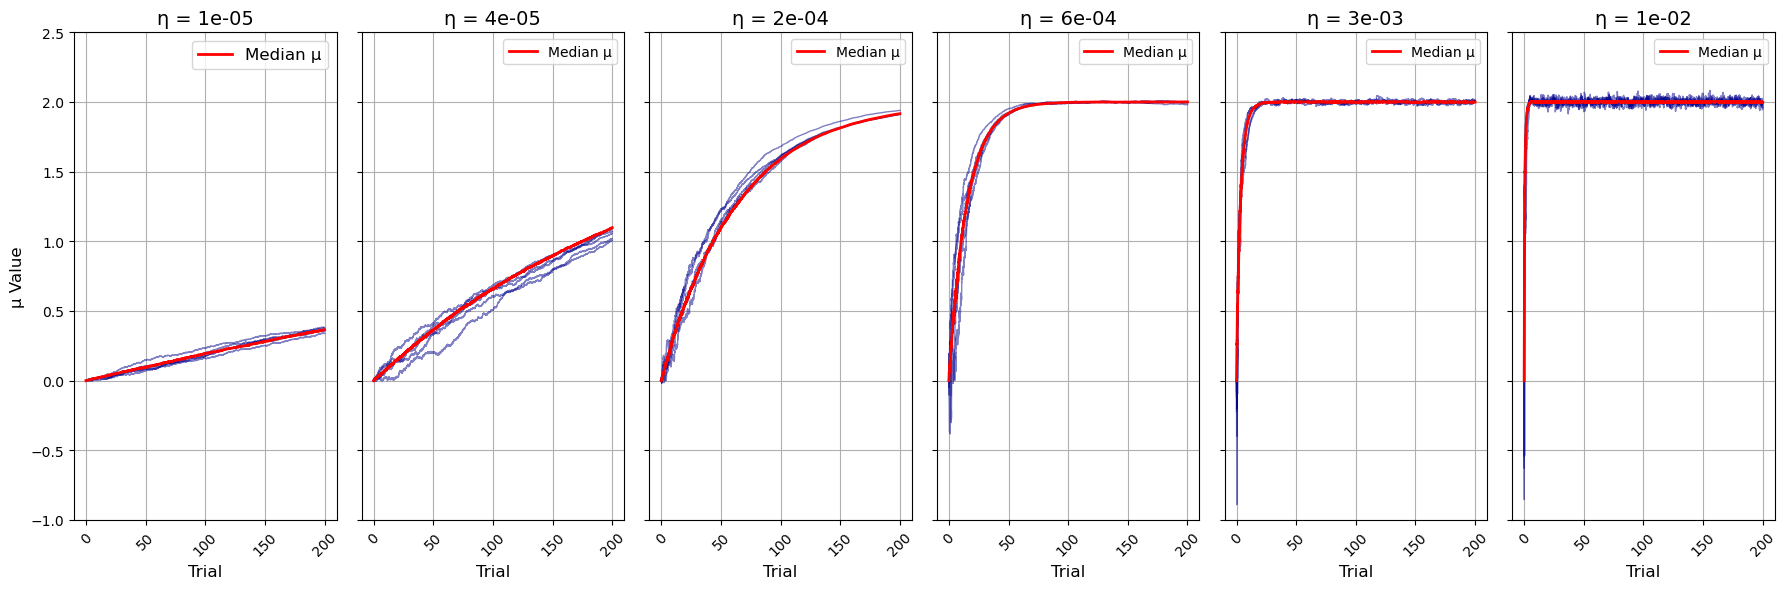

In [76]:
# Initialize a DataFrame to store convergence probabilities (optional, for later analysis)
mu0 = 0          # Initial value of mu
m = 2            # True mean
sigma = 0.1        # Standard deviation of y
trials = 10000
simulations = 200
prob_list = []

# Set up the subplots: 1 row x 6 columns
num_plots = len(eta_values)
cols = num_plots
rows = 1
fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 6), sharey=True)

# If only one subplot, convert axes to a list for consistency
if num_plots == 1:
    axes = [axes]

# Loop over each eta with a progress bar
for j, eta in enumerate(tqdm(eta_values, desc="Learning Rates")):
    # Simulate 'runs' number of mu histories
    all_mu_histories = np.zeros((simulations, trials+1))  # Shape: (runs, trials+1)

    for run in range(simulations):
        mu_history = simulate_mu(mu0, m, sigma, eta, trials)
        all_mu_histories[run] = mu_history

    # Randomly select 5 runs to plot
    selected_runs_indices = np.random.choice(simulations, size=5, replace=False)
    selected_runs = all_mu_histories[selected_runs_indices]

    # Compute the median mu at each trial across all runs
    median_mu = np.median(all_mu_histories, axis=0)

    # Plotting on the corresponding subplot
    ax = axes[j]

    # Plot the 5 selected runs
    for run in selected_runs:
        sns.lineplot(x=np.arange(trials + 1), y=run, ax=ax, color='darkblue', alpha=0.5, linewidth=1)

    # Plot the median mu
    sns.lineplot(x=np.arange(trials + 1), y=median_mu, ax=ax, color='red', label='Median μ', linewidth=2)


    # Set plot titles and labels
    ax.set_title(f'η = {eta:.0e}', fontsize=14)
    ax.set_xlabel('Trial', fontsize=12)

    # Only set y-label on the first subplot
    if j == 0:
        ax.set_ylabel('μ Value', fontsize=12)

    # Customize x-axis ticks to be more readable
    # For trials=200, set ticks at 0, 50, 100, 150, 200
    tick_positions = [0, trials // 4, trials // 2, 3 * trials // 4, trials]
    tick_labels = ['0', '50', '100', '150', '200']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)

    # Add grid for better readability
    ax.grid(True)
    plt.ylim(-1,2.5)

    # Add legend only to the first subplot to avoid clutter
    if j == 0:
        ax.legend(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


learning rate: 100%|██████████| 6/6 [00:25<00:00,  4.18s/it]


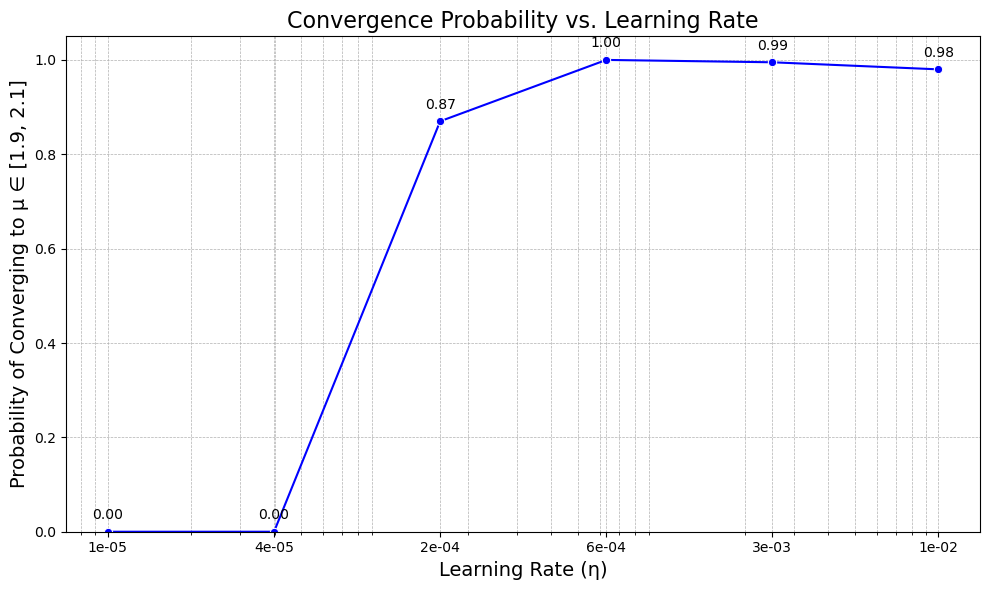

In [63]:
mu0 = 0          # Initial value of mu
m = 2            # True mean
sigma = 0.1        # Standard deviation of y
trials = 10000
simulations = 200
prob_list = []

# Loop over each eta with a progress bar
for eta in tqdm(eta_values, desc='learning rate'):
    success = 0  # Counter for successful convergences
    
    for _ in range(simulations):
        # Simulate mu history
        mu_history = simulate_mu(mu0, m, sigma, eta, trials)
        
        # Check convergence
        if (mu_history[-1] >= 1.9) and (mu_history[-1] <= 2.1):
            success += 1
    
    # Compute probability
    prob = success / simulations
    prob_list.append(prob)

# Create a DataFrame for plotting
prob_df = pd.DataFrame({
    'η': eta_values,
    'Probability': prob_list
})

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn
sns.lineplot(data=prob_df, x='η', y='Probability', marker='o', color='blue')

# Set x-axis to logarithmic scale
plt.xscale('log')

# Set y-axis limits
plt.ylim(0, 1.05)

plt.xticks(eta_values, [f'{eta:.0e}' for eta in eta_values])

# Add labels and title
plt.xlabel('Learning Rate (η)', fontsize=14)
plt.ylabel('Probability of Converging to μ ∈ [1.9, 2.1]', fontsize=14)
plt.title('Convergence Probability vs. Learning Rate', fontsize=16)

# Add grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Annotate data points with probability values
for idx, row in prob_df.iterrows():
    plt.text(row['η'], row['Probability'] + 0.02, f"{row['Probability']:.2f}",
             ha='center', va='bottom', fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

As we increase the learning rate, we get higher $\Delta \mu$ as we found out that  $E[\Delta \mu|\mu] = 2 \eta (m - \mu)$

From this, we can understand that with higher addition to $\mu$ in every step we get a better exploration of our possible results which lead to higher convergence to our target value.

### Part b

In [6]:
mu_history = simulate_mu(mu0, m, sigma, eta, trials)

In [7]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def reward_function2(y, m):

    r = np.where(y <= m, -2 * (m - y)**2, -(m - y)**2)
    return r

def gaussian_pdf(y, mu, sigma):
 
    coef = 1 / np.sqrt(2 * np.pi * sigma**2)
    exponent = - ((y - mu)**2) / (2 * sigma**2)
    g = coef * np.exp(exponent)
    return g


def update_mu1(mu_current, y, r, eta, sigma):
   
    delta_mu = eta * r * (y - mu_current) / sigma**2
    print(delta_mu) 
    mu_new = mu_current + delta_mu
    return mu_new

def simulate_mu2(mu0, m, sigma, eta, trials):
  
    mu = mu0
    mu_history = np.zeros(trials + 1)
    mu_history[0] = mu0
    
    for t in range(1, trials + 1):
        # Sample y from N(mu, sigma^2)
        y = np.random.normal(mu, sigma)
        #if (y<1 or y>5):
         #   y = np.random.choice(np.linspace(1,5))
        
        # Compute reward r(y)
        r = reward_function1(y, m)
        
        # Update mu
        mu = update_mu(mu, y, r, eta, sigma)
        
        # Store mu
        mu_history[t] = mu
        
    return mu_history

In [8]:
mu0 = 0          # Initial value of mu
m = 2  
eta = 0.001         
sigma_list = [0.1,0.5]       # Standard deviation of y
trials = 10000
simulations = 200
media_mu_sigma = [] 
r_list = []
y_list = []
y_values = np.linspace(1, 5, 400)  # y from 0 to 4
for sigma in tqdm(sigma_list, desc='Sigma'):
    for _ in range(simulations):
        # Simulate mu history
        y = np.random.choice(y_values)
        r = reward_function2(y, m)
        mu_history = simulate_mu2(mu0, m, sigma, eta, trials) 
        y_list.append(y)
        r_list.append(r)
        media_mu_sigma.append(np.median(mu_history)) 

# Separate median mu for each sigma
median_mu_0_1 = np.median(media_mu_sigma[:simulations])
median_mu_0_5 = np.median(media_mu_sigma[simulations:])

# Create a DataFrame for plotting
rew_df = pd.DataFrame({
    'Y_values': np.array(y_list),
    'reward': np.array(r_list),
})

# Set the figure size for better readability


Sigma: 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]


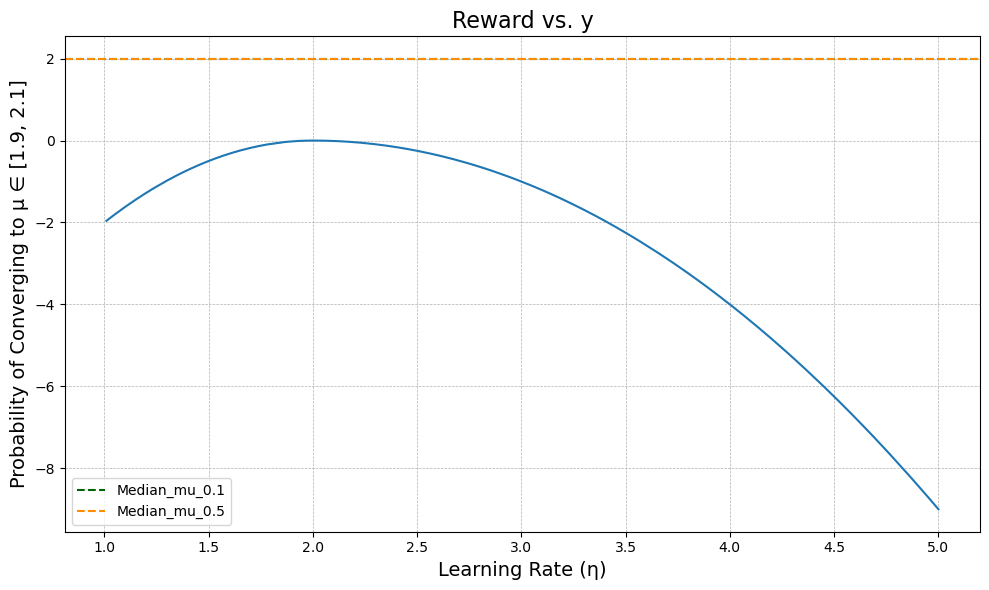

In [11]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn
ax = sns.lineplot(data=rew_df, x='Y_values', y='reward')
ax.axhline(y=media_mu_sigma[0], color='darkgreen', linestyle='--', label='Median_mu_0.1')
ax.axhline(y=media_mu_sigma[1], color='darkorange', linestyle='--', label='Median_mu_0.5')

# Add legend to axhline
plt.legend()



# Add labels and title
plt.xlabel('Learning Rate (η)', fontsize=14)
plt.ylabel('Probability of Converging to μ ∈ [1.9, 2.1]', fontsize=14)
plt.title('Reward vs. y', fontsize=16)

# Add grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)


# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()